In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
data = pd.read_csv('./Prostate_Cancer.csv')

print(data.shape)

data.head()

(100, 10)


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


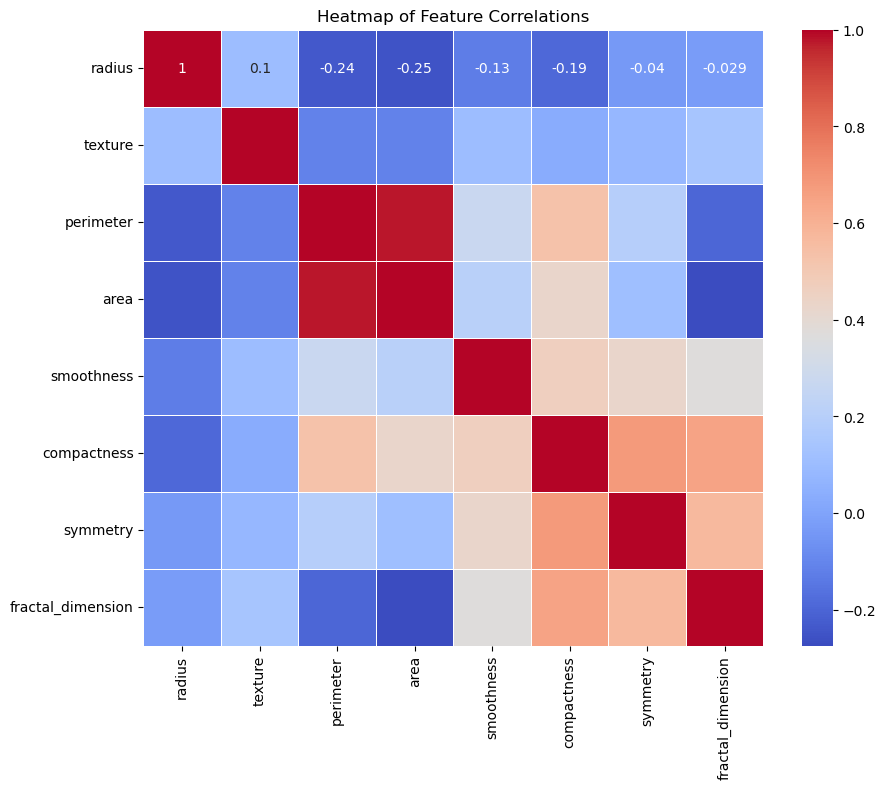

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = data.drop(columns=['id', 'diagnosis_result'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Heatmap of Feature Correlations')

# Show the plot
plt.show()

In [10]:

import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Load the dataset

data['diagnosis_result'] = data['diagnosis_result'].astype(
    'category').cat.codes # Convert categorical to numerical means 1 for M and 0 for B

# Define features and target
X = data.drop(['id', 'diagnosis_result'], axis=1)  # Features
y = data['diagnosis_result']  # Target

# First, apply Random Under Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Next, apply SMOTE to the undersampled dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Combine the resampled features and target into a single DataFrame
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(
    y_resampled, columns=['diagnosis_result'])], axis=1)

# Display the class distribution before and after resampling
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(y_resampled.value_counts())

Original class distribution:
diagnosis_result
1    62
0    38
Name: count, dtype: int64

Resampled class distribution:
diagnosis_result
0    38
1    38
Name: count, dtype: int64


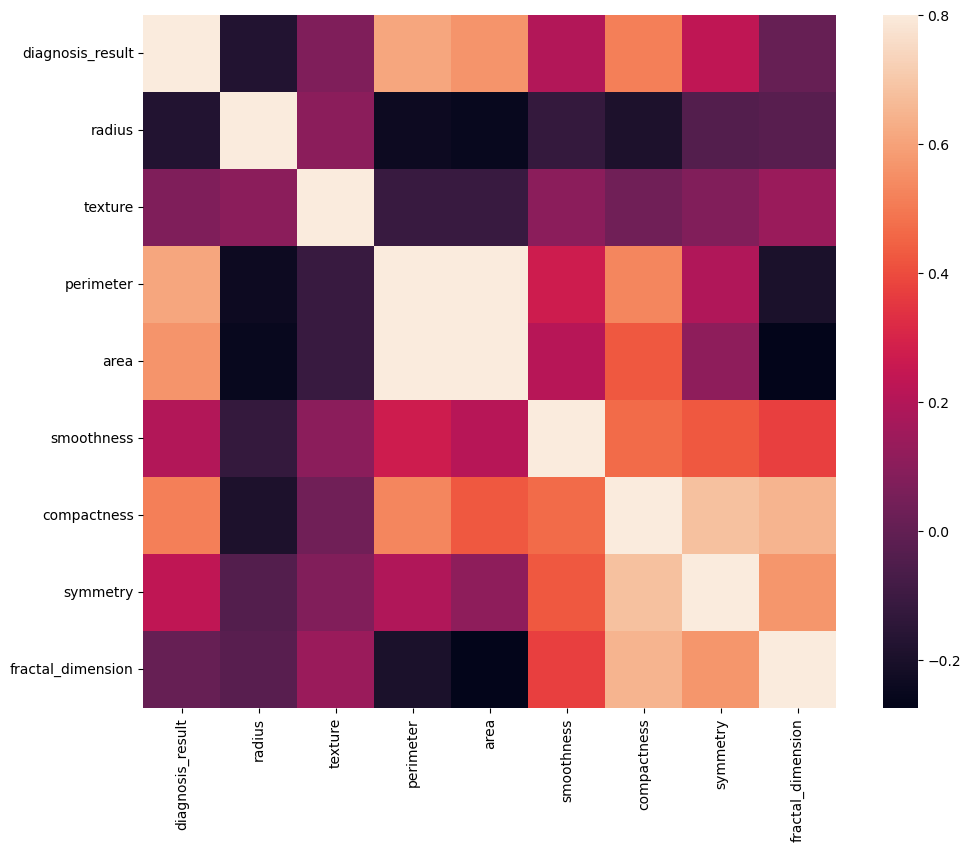

In [15]:
corrmat = data.corr()
fig = plt.figure(figsize=(12, 9)) # width and height of the plot
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()